# Regatta Analysis

Welcome to the Regatta Analysis Web "book".  This is the intro "chapter"... more follows in other "chapters". 

The goal of this project is to capture data from a sailboat during a race, or practice, so that we can go back later to understand what happened.  Particularly:

- What were the conditions?
- How did they change during the race?
- How fast were we sailing?
- What angles were we sailing?
- Could we have gone faster?  How?
- Were our maneuvers efficient?  Where our tacks too fast, too slow, or just right?
- Could we have made better strategic decisions? E.G. Based on current and conditions.
- Could we have made better tactical decisions? E.G. Based on wind shifts.
- Were weather and current predictions accurate?

One of my sailing heros is Arvel Gentry [LINK](http://www.gentrysailing.com/) (along with [Paul Cayard](https://en.wikipedia.org/wiki/Paul_Cayard) and [Frank Bethwaite](https://en.wikipedia.org/wiki/Frank_Bethwaite)).
Arvel was an aerodynamics engineer and avid racer in San Diego (he seems to have had a big impact on the North Sails leaders as well).  It's possible that Arvel was the first to collect quantitative performance data from his boat during races in 1974! [LINK](http://www.gentrysailing.com/pdf-theory/Are-You-at-Optimum-Trim.pdf).

![title](Data/Images/gentry_data_recorder.png)

Using this primitive device Arvel recorded boat speed and apparent wind speed.  And by adding notes during a practice run, he collected apparent wind angle and other conditions.  

**Our goals are the same.  Record data so that we can better understand what we did, and how we can do better.**

## Table of Contents

The content in this project is split across multiple Jupter notebooks with associated python libraries as well.  Each notebook introduces a single concept that is valuable in the analysis of race data.

- This notebook will give a general overview of the data we collect, provides some examples of how that data can be viewed.

- [Race Logs](Race_Logs.ipynb) Describes our framework for organizing information about the logs captured on multiple days during multiple Regattas.  I also use this notebook to keep the table of info up to date.

- [Capturing Data from the Boat Using Canboat](Canboat_Datacapture.ipynb) Discusses how data is captured, transferred, processed, and then loaded into Python/Pandas.

- [Boat Instruments](Boat_Instruments.ipynb) 

- True Wind.

- How to find tacks, and analyze them.

- Tides and currents.

- Past weather and relating that to races.

- Polars, external data and measurement.

- And many more.

## Python, Jupyter, Pandas, and Regatta Analysis

This "book" is written using Python, [Jupyter notebooks](https://jupyter.org/), and [Pandas](https://pandas.pydata.org/)

- Python is a powerful programming language that is also easy to use.  It is great for data analysis and visualization.  It has tremendous online support and huge set of useful libraries.  (Note, all programmers have their favorite languages, but Python is a super safe compromise.  No one wastes their time by learning Python!)

- A Jupyter notebook is a live web page that includes running Python code and supports data analysis with visualization
   - To quote: The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

- Pandas is a python library that includes great tools for data analysis (though I find its design undisciplined).
   - To quote: **pandas** is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language"

The central object in Pandas is the DataFrame.  Its a table of data, with rows and columns.  After we are done with a bunch of massaging, the data from the boat will end up as a Dataframe.

### Caveats

Jupyter is not the greatest way to make an interactive website.  It creates websites, sure, but there are specific interactive and dynamic javascript tools that might be better.  Why Jupyter?  Becasue all/most the code that is used to display and manipulate the data is right there in front of you.  Fancier, more responsive sites, require a lot of invisible programming (in Javascipt, etc) that would make it harder to customize and explore.  *Jupyter gives you some ability to explore, but it also gives you the ability to generate and modify.*

## Some Examples

An example is worth a 1000 words.  Below is the type of data that we hope to get from the boat (though it is simplified from real data).

In [17]:
# Import some Python libraries.  This will become familiar,  but for now just assume its necessary.
%matplotlib notebook

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qgrid

# These are libraries written for RaceAnalysis.  More on this elsewhere!
from global_variables import G
G.init_seattle(logging_level="WARNING")
from nbutils import display_markdown, display
import race_logs
import process
import analysis
import chart
import metadata

In [2]:
# Read some example data and load it into a DataFrame
df = pd.read_pickle(os.path.join(G.DATA_DIRECTORY, "basic_example.pd"))
# Display the DataFrame
df

,row_times,latitude,longitude,awa,aws,hdg,spd,sog,cog
1005,10:25:08 AM,47.683,-122.405,-85.837,0.854,279.040,1.437,1.551,290.598
1006,10:25:09 AM,47.683,-122.405,-86.364,0.892,279.065,1.438,1.555,290.655
1007,10:25:09 AM,47.683,-122.405,-86.861,0.927,279.087,1.440,1.558,290.731
1008,10:25:09 AM,47.683,-122.405,-87.321,0.958,279.105,1.441,1.561,290.825
1009,10:25:09 AM,47.683,-122.405,-87.741,0.986,279.121,1.442,1.565,290.934
1010,10:25:09 AM,47.683,-122.405,-88.115,1.010,279.134,1.444,1.568,291.056
1011,10:25:09 AM,47.683,-122.405,-88.439,1.028,279.143,1.445,1.572,291.188
1012,10:25:09 AM,47.683,-122.405,-88.707,1.041,279.151,1.447,1.575,291.327
1013,10:25:09 AM,47.683,-122.405,-88.915,1.049,279.155,1.449,1.579,291.471
1014,10:25:09 AM,47.683,-122.405,-89.057,1.051,279.157,1.451,1.582,291.618


## Each Row Tells the Story

The the table above, row contains the "current" value for each instrument.  Each row describes the instantaneous state of the boat, and it removes one of the more complex issues in the analysis of boat data.  On the boat, each instrument is separate and it sends out updates at a frequent, but not synchronous, rate.  

In other words, boat speed (SPD) is measured with a paddle wheel in the hull, and the values are sent asynchronously from the apparent wind angle (AWA) which is measured with a wind vane at the mast head.  Some instruments send rapid updates and others infrequent updates.  The onboard GPS sends full updates once per second (with GPS time and number of satellites, etc) and rapid updates 10x a second (only containing lat/lon).

The data processing pipeline will reorganize this asynchronous data into a single table, which is much more easily interpreted and analyzed.

## Glossary

There are some (mostly) standard names for instruments on the boat.  Here is a quick glossary that may be helpful if these are unfamiliar.

### Instruments and their Measurements
- AWA: apparent wind angle, the angle of the wind blowing at the top the mast (fast but noisy)
- AWS: apparent wind speed, the speed at the mast head (fast and noisy)
- SPD: boat speed **through the water** measured with the paddle wheel speedo in the hull (fast and noisy)
- HDG: compass heading (on PG this is magnetic northa and not true north, though easily corrected using magnetic variation/declination).
- COG and SOG: course and speed over ground from the GPS (these are relative to true north not magnetic on PG). These can differ from HDG/SPD because of current and leeway.

### Computed Quantities
- TWS: true wind speed, the speed of the wind over the ground (computed from the above quantities using the "wind triangle").
- TWD: true wind direction, the angle of the wind blowing over the ground (see "wind triangle").
- TWA: true wind angle, the angle of the wind over the ground reported relative the orientation of the boat (same)

![im](Data/Images/out.png)

### Other Quantities of Interest
- CURRENT: Speed of water flow triggered by tides.
- DEPTH: depth of water beneath the sensor.
- TIDES: Principally used to understand depth, and predict currents

## Loading an Entire Race

The DataFrame above is super brief, and it shows just a few rows and a subset of the columns.  Below we will load an entire day on the water.

In [18]:
date = '2020-07-13'
df, race = race_logs.read_date(date)

display_markdown("## Race Metadata")
display_markdown("After every race we sit down and enter a few notes on how we did.")
metadata.race_summary(race)

## Race Metadata

After every race we sit down and enter a few notes on how we did.

- **2020-07-13**: STYC Monday 
  - *Description:* Beautiful evening sail.  5 of the 105s came out. Corvo, Jubilee, creative, liftoff and us.  Marisa made lovely green masks for us.  
  - *Conditions:* Wind from true north.  Ranged from 5-13 knots.  Some one knot current push sometimes


<IPython.core.display.Javascript object>


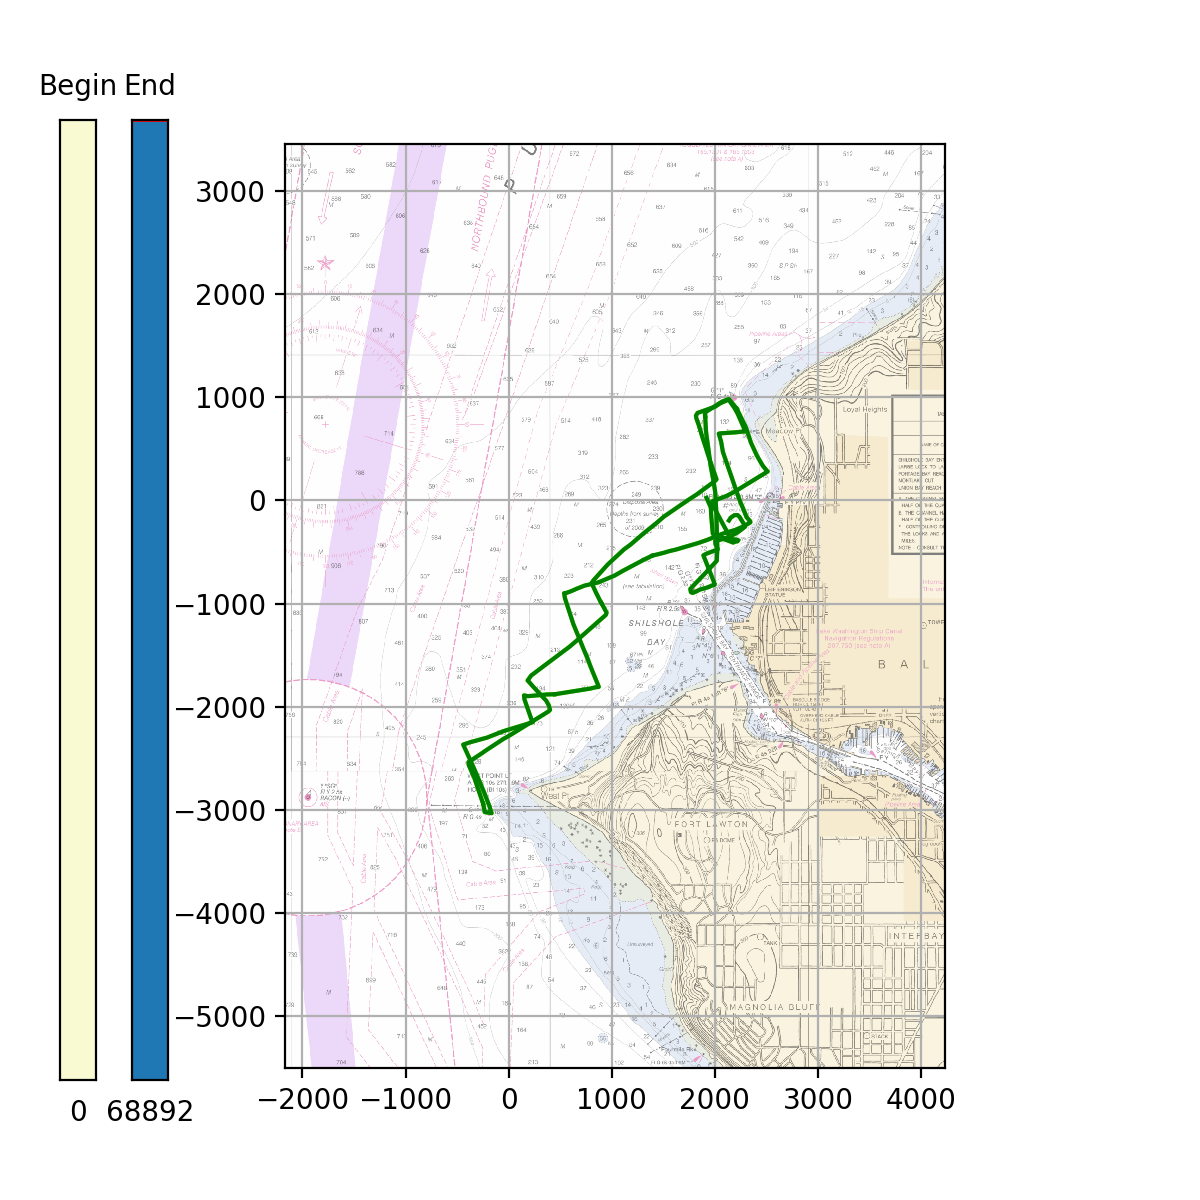

In [6]:
example_chart = chart.trim_track(df)

In [7]:
# Display a bit of the table (note, the notebook will only show a few of the rows and 
# columns, notice the "..." which appear)
df

,zeus_cog,zeus_sog,raws,rawa,row_seconds,turn_rate,rhdg,rudder,rsog,latitude,...,tws,twa,stwd,stws,stwa,spd,sog,hdg,cog,row_times
21471,152.000,3.800,3.870,-78.700,2147.100,-0.577,136.300,0.000,3.830,47.688,...,4.946,-124.108,26.464,4.673,-125.027,3.411,3.855,136.606,152.944,2020-07-13 18:37:57.678588958-07:00
21472,152.000,3.800,3.870,-77.200,2147.200,-0.225,136.200,0.100,3.830,47.688,...,4.946,-124.015,26.463,4.673,-124.927,3.407,3.850,136.525,152.859,2020-07-13 18:37:57.778387287-07:00
21473,152.100,4.010,3.870,-76.400,2147.300,-0.044,136.200,0.200,3.830,47.688,...,4.946,-124.022,26.463,4.673,-124.928,3.404,3.846,136.460,152.764,2020-07-13 18:37:57.878185616-07:00
21474,152.100,4.010,3.870,-77.600,2147.400,0.132,136.200,0.300,3.840,47.688,...,4.946,-124.030,26.462,4.673,-124.928,3.385,3.845,136.408,152.657,2020-07-13 18:37:57.977983945-07:00
21475,152.100,4.010,3.870,-79.900,2147.500,0.132,136.200,0.300,3.840,47.688,...,4.946,-124.043,26.461,4.673,-124.929,3.370,3.844,136.366,152.561,2020-07-13 18:37:58.077782274-07:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,216.900,3.240,3.370,160.300,9035.900,0.780,203.000,-0.100,3.160,47.686,...,6.911,-194.500,21.344,6.043,-196.847,2.576,3.154,202.079,212.787,2020-07-13 20:32:46.364201760-07:00
90360,216.900,3.240,3.370,161.200,9036.000,0.780,203.100,-0.400,3.160,47.686,...,6.911,-194.601,21.345,6.043,-196.946,2.575,3.155,202.283,212.679,2020-07-13 20:32:46.464257741-07:00
90361,215.100,3.030,3.870,161.600,9036.100,0.247,203.200,-0.600,3.160,47.686,...,6.911,-194.700,21.346,6.043,-197.044,2.574,3.156,202.466,212.781,2020-07-13 20:32:46.564313722-07:00
90362,215.100,3.030,3.870,160.000,9036.200,0.071,203.300,-0.500,3.160,47.686,...,6.911,-194.800,21.347,6.044,-197.143,2.573,3.157,202.633,212.933,2020-07-13 20:32:46.664369703-07:00


In [8]:
# Display the full list of columns
df.columns

Index(['zeus_cog', 'zeus_sog', 'raws', 'rawa', 'row_seconds', 'turn_rate',
       'rhdg', 'rudder', 'rsog', 'latitude', 'longitude', 'rspd', 'depth',
       'zeus_altitude', 'zeus_gnss_type', 'variation', 'altitude',
       'geoidal_separation', 'zg100_pitch', 'zg100_roll', 'rcog', 'timestamp',
       'awa', 'aws', 'cawa', 'caws', 'scawa', 'scaws', 'twd', 'tws', 'twa',
       'stwd', 'stws', 'stwa', 'spd', 'sog', 'hdg', 'cog', 'row_times'],
      dtype='object')

In [9]:
# We'll store information about the meanings of these columns in a DataFrame!
column_df = pd.read_pickle(os.path.join(G.DATA_DIRECTORY, "column_info.pd"))

# And display in an edittable grid.  Be sure to scroll around.
grid = qgrid.show_grid(column_df, show_toolbar=True)
grid


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [10]:
# If you do update the table shown above, then this will save the changes (which are not saved by default)

if False:
    new_df = w.get_changed_df()
    new_df.to_pickle(os.path.join(G.DATA_DIRECTORY, "column_info.pd"))

In [11]:
# As in the initial example, we can focus on the critical columns.
good_cols = "row_times latitude longitude awa aws hdg spd sog cog".split()
# Note, this split biz is just a way for me to quickly type a long list with out all the 
# punctuation.  Rather than ['a', 'b', 'c'] I type "a b c".split()
print(good_cols)
df[good_cols]

['row_times', 'latitude', 'longitude', 'awa', 'aws', 'hdg', 'spd', 'sog', 'cog']


,row_times,latitude,longitude,awa,aws,hdg,spd,sog,cog
21471,2020-07-13 18:37:57.678588958-07:00,47.688,-122.413,-84.610,4.103,136.606,3.411,3.855,152.944
21472,2020-07-13 18:37:57.778387287-07:00,47.688,-122.413,-84.401,4.095,136.525,3.407,3.850,152.859
21473,2020-07-13 18:37:57.878185616-07:00,47.688,-122.413,-84.174,4.087,136.460,3.404,3.846,152.764
21474,2020-07-13 18:37:57.977983945-07:00,47.688,-122.413,-83.987,4.080,136.408,3.385,3.845,152.657
21475,2020-07-13 18:37:58.077782274-07:00,47.688,-122.413,-83.871,4.073,136.366,3.370,3.844,152.561
...,...,...,...,...,...,...,...,...,...
90359,2020-07-13 20:32:46.364201760-07:00,47.686,-122.410,166.394,3.681,202.079,2.576,3.154,212.787
90360,2020-07-13 20:32:46.464257741-07:00,47.686,-122.410,166.244,3.669,202.283,2.575,3.155,212.679
90361,2020-07-13 20:32:46.564313722-07:00,47.686,-122.410,166.098,3.675,202.466,2.574,3.156,212.781
90362,2020-07-13 20:32:46.664369703-07:00,47.686,-122.410,165.906,3.680,202.633,2.573,3.157,212.933


<IPython.core.display.Javascript object>


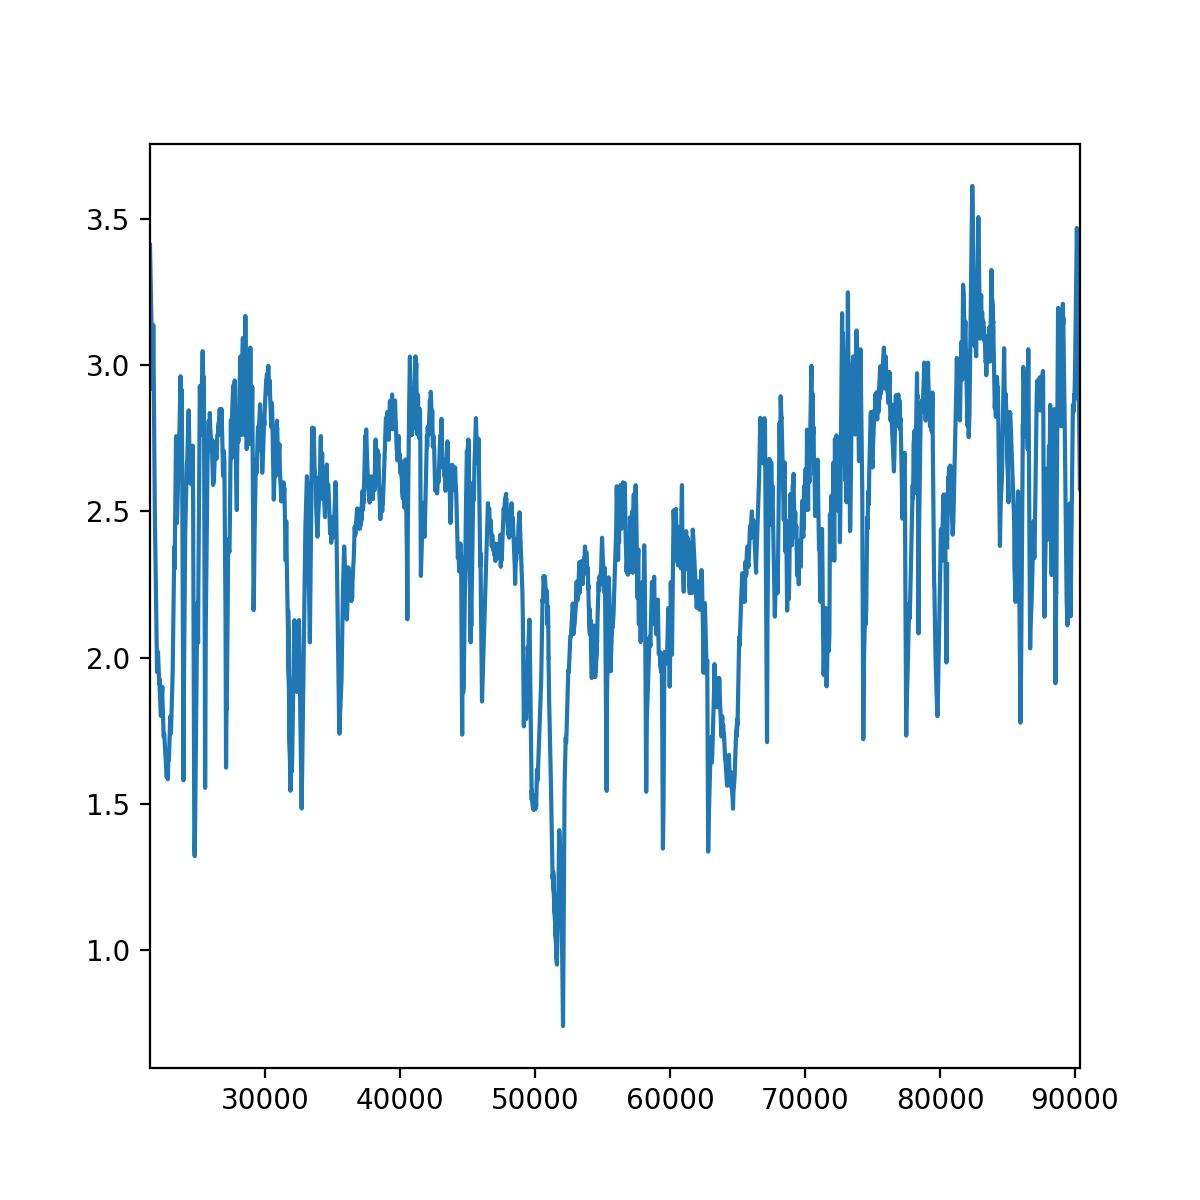

In [12]:
# We can graph values versus time

# Recall that distance is stored in METERS (and METERS PER SECOND).
plt.figure()
df.spd.plot()

<IPython.core.display.Javascript object>


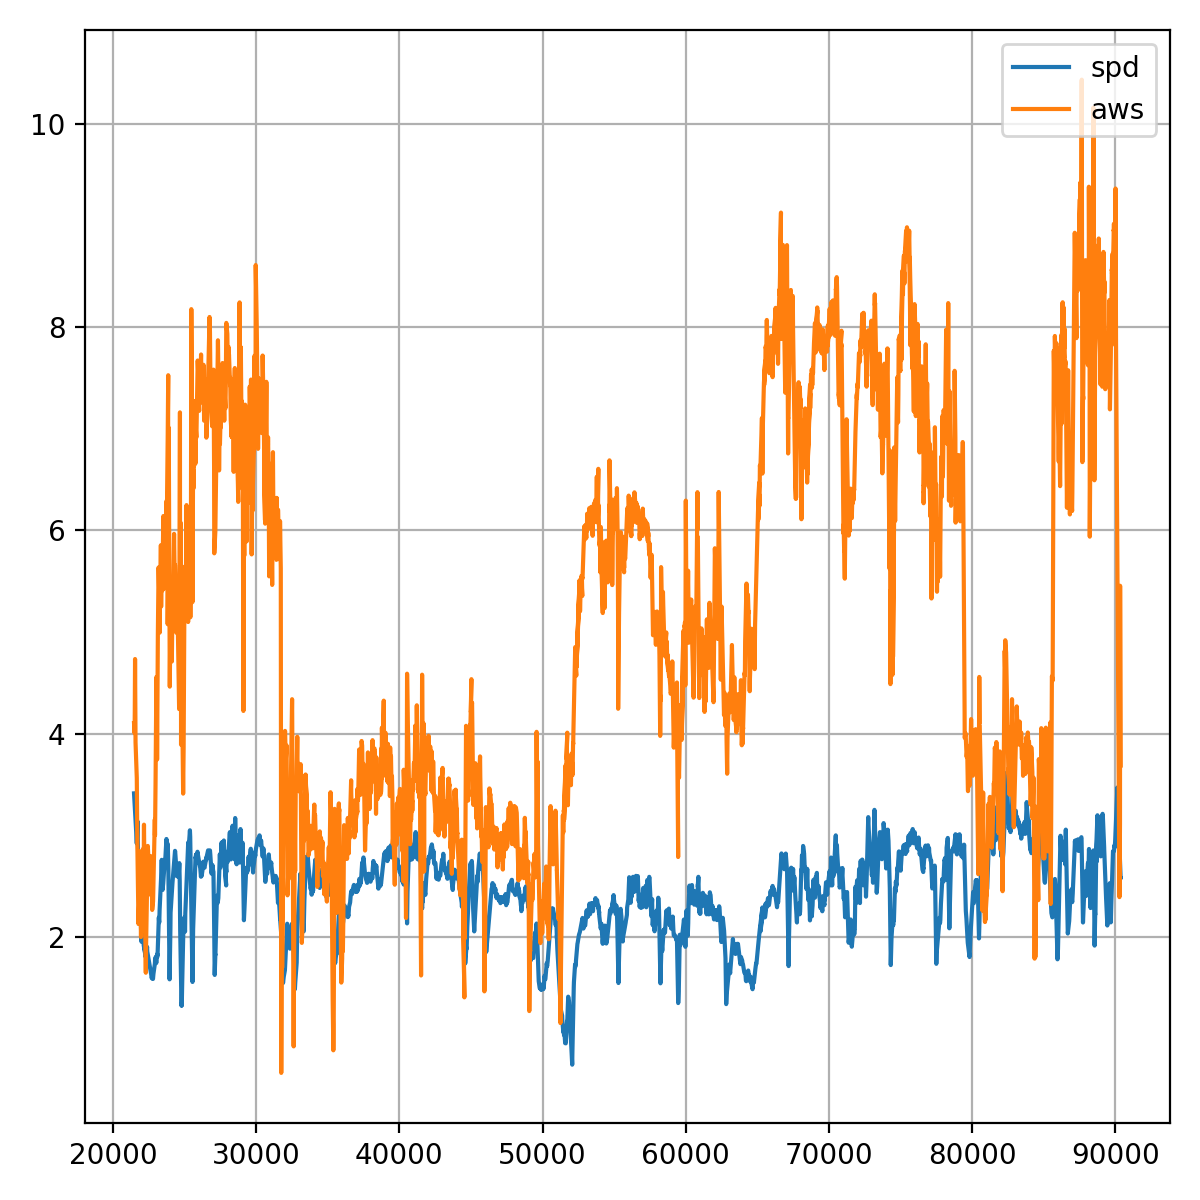

{'trim_func': <function chart.quick_plot_ax.<locals>.trim_func(*args)>,
 'update_func': <function chart.quick_plot_ax.<locals>.update_func(begin, end)>}

In [15]:
# Or we can plot quantities and compare them

chart.quick_plot(df.index, (df.spd, df.aws), ["spd", "aws"])

# Conclusions

In 2020, we have many more automated tools than Arvel Gentry did in 1974.  Our goals remain the same.  Understand conditions and learn how to sail better.